#### DEMO LOGISTIC REGRESSION _ BUY NEW CAR OR NO

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import classification_report,confusion_matrix
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [72]:
data = pd.read_csv("./Data/Social_Network_Ads.csv", usecols=["Age", "EstimatedSalary_K", "Purchased"])
data.sample(5)

,Age,EstimatedSalary_K,Purchased
59,32,117,0
369,54,26,1
259,45,131,1
62,23,66,0
235,46,79,1


In [73]:
data.describe()

,Age,EstimatedSalary_K,Purchased
count,400.000000,400.00000,400.000000
mean,37.655000,69.74250,0.357500
std,10.482877,34.09696,0.479864
min,18.000000,15.00000,0.000000
25%,29.750000,43.00000,0.000000
50%,37.000000,70.00000,0.000000
75%,46.000000,88.00000,1.000000
max,60.000000,150.00000,1.000000


In [74]:
print(Counter(data["Purchased"]))

Counter({0: 257, 1: 143})


In [75]:
X = data[["Age", "EstimatedSalary_K"]]
y= data["Purchased"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 42)

In [77]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [78]:
print("Intercept: %.5f" %model.intercept_)
print("Coefficient: ", model.coef_)

Intercept: -10.90617
Coefficient:  [[0.19760279 0.03312442]]


In [79]:
print("Train accuracy score: ", model.score(X_train, y_train))
print("Test accuracy ccore: ", model.score(X_test, y_test))

Train accuracy score:  0.8321428571428572
Test accuracy ccore:  0.85


In [80]:
#  Sử dụng các đại lượng khác đánh giá tập test 
y_pred = model.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred,average='macro'))
print("Recall: ", recall_score(y_test,y_pred,average='macro'))
print("F1 Score: ", f1_score(y_test,y_pred))

Accuracy Score:  0.85
Precision:  0.877742946708464
Recall:  0.8160886039055668
F1 Score:  0.775


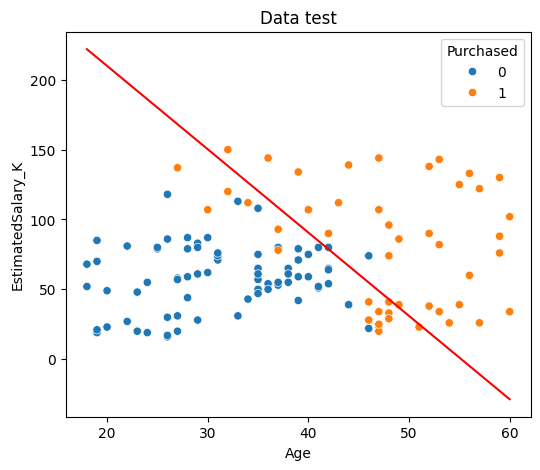

In [81]:
# Visualize_data(X_test.Age,X_test.EstimatedSalary_K,Y_test,'Data test')
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_test.Age,y=X_test.EstimatedSalary_K,hue=y_test)
x0=np.min(X_test.Age)
x1=np.max(X_test.Age)
y0=-(model.intercept_ + x0*model.coef_[0][0])/model.coef_[0][1]
y1=-(model.intercept_ + x1*model.coef_[0][0])/model.coef_[0][1]
plt.plot([x0,x1],[y0,y1],'r')
plt.title('Data test')
plt.show()

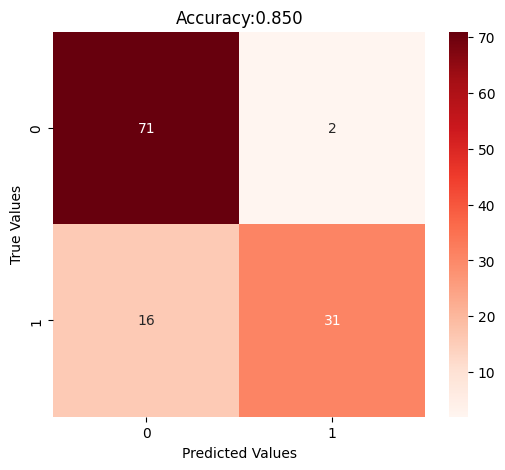

In [82]:
#   Vẽ confusion Matrix và nhận xét trên tập test
cm = confusion_matrix(y_test, model.predict(X_test))
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Reds')
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

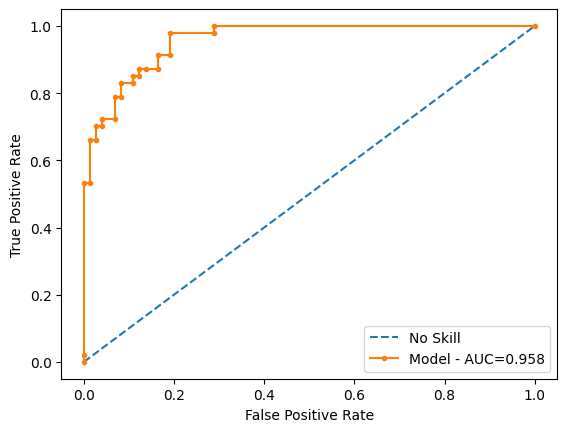

In [83]:
#  Vẽ ROC_AUC và nhận xét kết quả trên tập test
y_prob = model.predict_proba(X_test)[:,1]
# calculate roc curves
fpr, tpr, threshold = roc_curve(y_test, y_prob)
# calculate scores
model_auc = roc_auc_score(y_test, y_prob)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill' )
plt.plot(fpr, tpr, marker='.', label='Model - AUC=%.3f' %  (model_auc))
# show axis labels and the legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

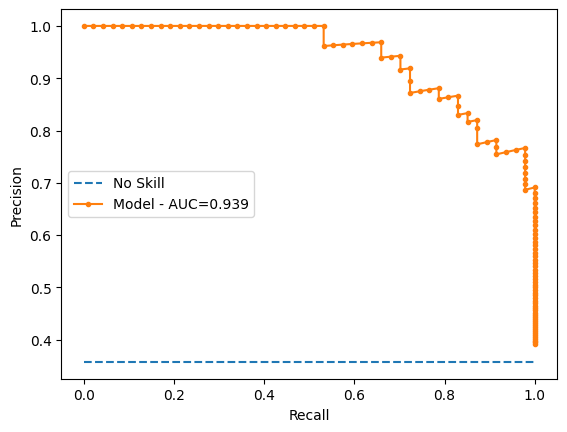

In [85]:
# calculate roc curves
y_prob = model.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_prob)
# calculate scores
model_auc = auc(recall, precision)
# plot the roc curve for the model
ns=len(y[y==1]) / len(y)
plt.plot([0,1], [ns,ns], linestyle='--', label='No Skill' )
plt.plot(recall, precision, marker='.', label='Model - AUC=%.3f' %  (model_auc))

# show axis labels and the legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

##### Hiệu Chỉnh Threshold

In [93]:
y_proba = model.predict_proba(X_test)[:,1]
y_proba

array([0.25205063, 0.97509199, 0.01953502, 0.85304767, 0.01408852,
       0.05096177, 0.8727475 , 0.08118433, 0.37338367, 0.38846561,
       0.13740813, 0.66663557, 0.00839795, 0.00204104, 0.10946058,
       0.3982802 , 0.65201362, 0.65356899, 0.14082719, 0.89539283,
       0.00345473, 0.07407353, 0.29797109, 0.96337986, 0.00146805,
       0.48336441, 0.51077327, 0.13713724, 0.9837381 , 0.00156844,
       0.38737937, 0.00789963, 0.72660109, 0.05972264, 0.63233647,
       0.1815707 , 0.14516658, 0.22370963, 0.00836942, 0.00607874,
       0.41869542, 0.01284515, 0.00358698, 0.27760931, 0.00481583,
       0.9162648 , 0.04089077, 0.08101386, 0.48422129, 0.05933844,
       0.03391901, 0.90745755, 0.17144483, 0.03502136, 0.27990876,
       0.01051857, 0.98698673, 0.13472437, 0.08872706, 0.09423155,
       0.24691924, 0.10890439, 0.91296378, 0.07645844, 0.03170839,
       0.26253188, 0.5925082 , 0.95895111, 0.22351108, 0.34474496,
       0.98092924, 0.01291786, 0.02534062, 0.00333874, 0.37927

In [96]:
#C1:
precision, recall, threshold = precision_recall_curve(y_test, y_proba)
f1_score_ = (2 * precision * recall) / (precision + recall)
pos = np.argmax(f1_score_)
print(threshold[pos], f1_score_[pos])

0.26253187573641307 0.8598130841121495


In [100]:
#C2:
result_map = {
    "Threshold": 0,
    "F1_Score": 0
}

for threshold_ in np.arange(0, 1, 0.1):
    y_proba = model.predict_proba(X_test)[:,1]
    y_pred = (y_proba >= threshold_)
    score = f1_score(y_test, y_pred)
    
    if score >= result_map["F1_Score"]:
        result_map["Threshold"] = threshold_
        result_map["F1_Score"] = score
        
print(result_map)

{'Threshold': 0.30000000000000004, 'F1_Score': 0.8367346938775511}
